In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [79]:
# Define subjects and maximum number of runs
subjects = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19"]
max_runs = 12
output_dir = '/Users/danieljanini/Documents/Thesis/motion_plots'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for sub in subjects:
    sub_dir = os.path.join(output_dir, f'sub-{sub}')
    os.makedirs(sub_dir, exist_ok=True)

    for run in range(1, max_runs + 1):
        path = f'/Users/danieljanini/Documents/Thesis/miniblock/derivatives/sub-{sub}/func/sub-{sub}_task-func_run-{run:02d}_desc-confounds_timeseries.tsv'

        if not os.path.exists(path):
            print(f"Run {run} not found for subject {sub}. Skipping.")
            continue

        # Load and select motion parameters
        data = pd.read_csv(path, sep='\t')
        motion_params = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
        motion = data[motion_params].dropna()

        # Plot
        plt.figure(figsize=(12, 6))
        for param in motion_params:
            plt.plot(motion[param], label=param)

        plt.title(f'Sub-{sub} Run-{run:02d} Head Motion Parameters')
        plt.xlabel('Timepoints (TRs)')
        plt.ylabel('Displacement (mm or radians)')
        plt.ylim(-3, 3)
        plt.legend()
        plt.tight_layout()

        # Save plot
        plot_path = os.path.join(sub_dir, f'sub-{sub}_run-{run:02d}_motion.png')
        plt.savefig(plot_path)
        plt.close()

        print(f"Saved: {plot_path}")


Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-01_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-02_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-03_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-04_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-05_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-06_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-07_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-08_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-09_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-10_motion.png
Saved: /Users/danieljanini/Documents/Thesis/motion_plots/sub-01/sub-01_run-11_motion.png
Run 12 not found for 

# Check accuracies 
## Functional data

In [3]:
import pandas as pd

subjects = ["01", "02", "03", "04", "05", "06", "07", "08", "10", "11", "12", "13", "14", "15", "17", "18", "19"]

# Initialize a dictionary to store the accuracies
accuracies = {}

# Loop over subjects and runs
for sub in subjects:  # List of subjects (replace with actual list of subjects)
    for run in range(1,10):  # List of runs (replace with actual list of runs)
        # Construct the file path
        pattern = f'/Users/danieljanini/Documents/Thesis/Behavior/CondRichData/P0{sub}_ConditionRich_Run{run}_*.csv'
        matches = glob.glob(pattern)
        path = matches[0]  # Assuming you get the correct file path

        # Read the CSV file
        df = pd.read_csv(path)

        condition = (df['responseEvent'] == 1)
        df_filtered = df[condition]
        conditions = np.array(df_filtered["eventEndTime"] - df_filtered["eventStartTime"])
        values, counts = np.unique(conditions, return_counts=True)
        most_frequent = values[np.argmax(counts)]

        if most_frequent == 3.75:
            runtype = "sus"
        elif df["imFile"][5] == df ["imFile"][7]:
            runtype = "miniblock"
        else: 
            runtype = "er"
        

        # Create a new column "responseWindow" with the given formula
        #df_filtered.loc[:, "responseWindow"] = (df_filtered["eventStartTime"].fillna(0) + df_filtered["fixRespStart"].fillna(0) + 2)

        # Calculate accuracy based on participant response time
        #correct_responses = (df_filtered["eventStartTime"] + df_filtered["participantResponse.rt"] <= df_filtered["responseWindow"]) & (df_filtered["participantReadyResponse.keys"].notna())
        correct_responses = df_filtered[df_filtered["participantResponse.keys"].notna()]
        accuracy = 100 * len(correct_responses) / len(df_filtered)

        # Store the accuracy in the dictionary using participant and run as the key
        accuracies[f"sub{sub}_run{run}"] = {
            "accuracy": accuracy,
            "runtype": runtype
        }

# Now you can print or use the accuracies dictionary
accuracies_df = pd.DataFrame.from_dict(accuracies, orient='index').reset_index()
accuracies_df.columns = ["Participant_Run", "Accuracy", "RunType"]
accuracies_df.to_csv("/Users/danieljanini/Documents/Thesis/accuracy_results.csv", index=False)


## Localizer data

In [4]:
subjects = ["01", "02", "03", "04", "05", "06", "07", "08", "10", "11", "12", "13", "14", "15", "17", "18", "19"]

# Initialize a dictionary to store the accuracies
localizer_accuracies = {}

# Loop over subjects and runs
for sub in subjects:  # List of subjects (replace with actual list of subjects)
    print("This is subject", sub)
    for run in range(1,4):  # List of runs (replace with actual list of runs)
        print("This is run", run)
        # Construct the file path
        pattern = f'/Users/danieljanini/Documents/Thesis/Behavior/LocData/P0{sub}_CategoryLocalizer_Run{run}_*.csv'
        matches = glob.glob(pattern)

        if matches == []:
            print(f"Run {run} not found for subject {sub}. Skipping.")
            continue

        # Read the CSV file
        df = pd.read_csv(matches[0])

        repeats = []
        image = ['start']
        
        for i in range(len(df)):
            if image == df["imFile"][i]:
                repeats.append(1)
            else: 
                repeats.append(0)
            if df["imFile"][i] != r"Stimuli\Blank.png":
                image = df["imFile"][i]


        df["repeats"] = repeats
        condition = (df['repeats'] == 1) 
        df_filtered = df[condition]
        correct_responses = df_filtered[df_filtered["participantResponse.keys"].notna()]
        accuracy = 100 * len(correct_responses) / (len(df_filtered))

        #print(len(df_filtered), sum(df_filtered["participantResponse.keys"].notna()))

        # Store the accuracy in the dictionary using participant and run as the key
        localizer_accuracies[f"sub{sub}_run{run}"] = {
            "accuracy": accuracy
        }

# Now you can print or use the accuracies dictionary
localizer_accuracies_df = pd.DataFrame.from_dict(localizer_accuracies, orient='index').reset_index()
localizer_accuracies_df.columns = ["Participant_Run", "Accuracy"]
localizer_accuracies_df.to_csv("/Users/danieljanini/Documents/Thesis/localizer_accuracy_results.csv", index=False)


This is subject 01
This is run 1
This is run 2
This is run 3
Run 3 not found for subject 01. Skipping.
This is subject 02
This is run 1
This is run 2
This is run 3
Run 3 not found for subject 02. Skipping.
This is subject 03
This is run 1
This is run 2
This is run 3
This is subject 04
This is run 1
This is run 2
This is run 3
This is subject 05
This is run 1
This is run 2
This is run 3
Run 3 not found for subject 05. Skipping.
This is subject 06
This is run 1
This is run 2
This is run 3
This is subject 07
This is run 1
This is run 2
This is run 3
This is subject 08
This is run 1
This is run 2
This is run 3
This is subject 10
This is run 1
This is run 2
This is run 3
This is subject 11
This is run 1
This is run 2
This is run 3
Run 3 not found for subject 11. Skipping.
This is subject 12
This is run 1
This is run 2
This is run 3
Run 3 not found for subject 12. Skipping.
This is subject 13
This is run 1
This is run 2
This is run 3
This is subject 14
This is run 1
This is run 2
This is run

# Create a nice image 

In [5]:
df = pd.read_csv('/Users/danieljanini/Documents/Thesis/accuracy_results.csv')

In [6]:
df.head(5)

,Participant_Run,Accuracy,RunType
0,sub01_run1,95.454545,er
1,sub01_run2,100.000000,miniblock
2,sub01_run3,100.000000,sus
3,sub01_run4,100.000000,er
4,sub01_run5,95.238095,miniblock


In [7]:
df[["Subject", "Run"]] = df["Participant_Run"].str.split("_", expand=True)

In [8]:
df.head(5)

,Participant_Run,Accuracy,RunType,Subject,Run
0,sub01_run1,95.454545,er,sub01,run1
1,sub01_run2,100.000000,miniblock,sub01,run2
2,sub01_run3,100.000000,sus,sub01,run3
3,sub01_run4,100.000000,er,sub01,run4
4,sub01_run5,95.238095,miniblock,sub01,run5


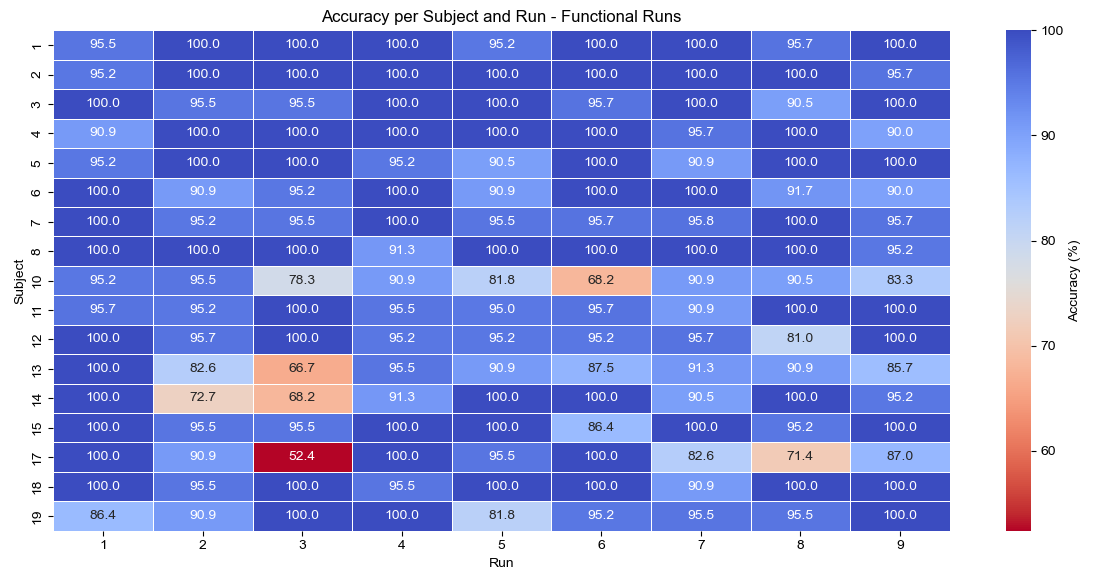

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert your accuracies dataframe into a pivot table
heatmap_data = df.copy()

# Separate subject and run as you already did
heatmap_data[["Subject", "Run"]] = heatmap_data["Participant_Run"].str.split("_", expand=True)
heatmap_data["Subject"] = heatmap_data["Subject"].str.replace("sub", "", regex=False)
heatmap_data["Run"] = heatmap_data["Run"].str.replace("run", "", regex=False)

# Convert to integers to sort properly
heatmap_data["Subject"] = heatmap_data["Subject"].astype(int)
heatmap_data["Run"] = heatmap_data["Run"].astype(int)

# Create a pivot table
pivot_table = heatmap_data.pivot(index="Subject", columns="Run", values="Accuracy")

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    cmap="coolwarm_r",
    linewidths=0.5,  # Set to 0 to remove gridlines entirely
    linecolor="white",
    annot=True, fmt=".1f",  # Optional: show values in cells
    cbar_kws={"label": "Accuracy (%)"}
)
sns.set_theme(style="whitegrid")
plt.title("Accuracy per Subject and Run - Functional Runs")
plt.xlabel("Run")
plt.ylabel("Subject")
plt.tight_layout()
plt.show()

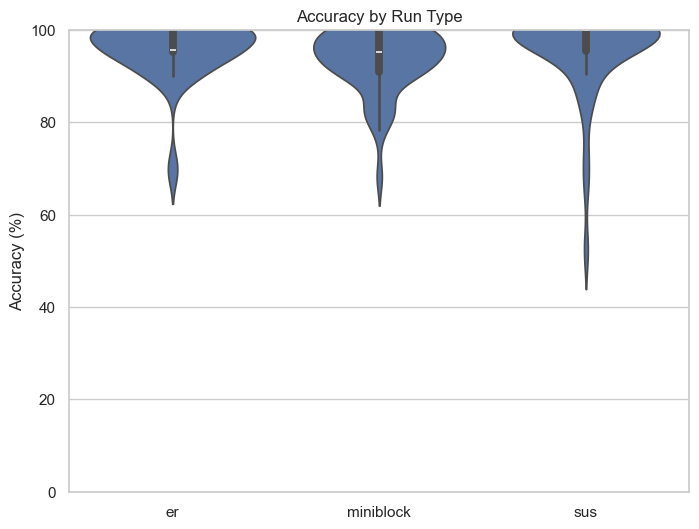

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="RunType", y="Accuracy", inner="box")
sns.set_theme(style="whitegrid")
plt.title("Accuracy by Run Type")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.xlabel("")
plt.show()

In [11]:
df = pd.read_csv('/Users/danieljanini/Documents/Thesis/localizer_accuracy_results.csv')

In [12]:
df.head(5)

,Participant_Run,Accuracy
0,sub01_run1,100.000000
1,sub01_run2,100.000000
2,sub02_run1,95.833333
3,sub02_run2,100.000000
4,sub03_run1,100.000000


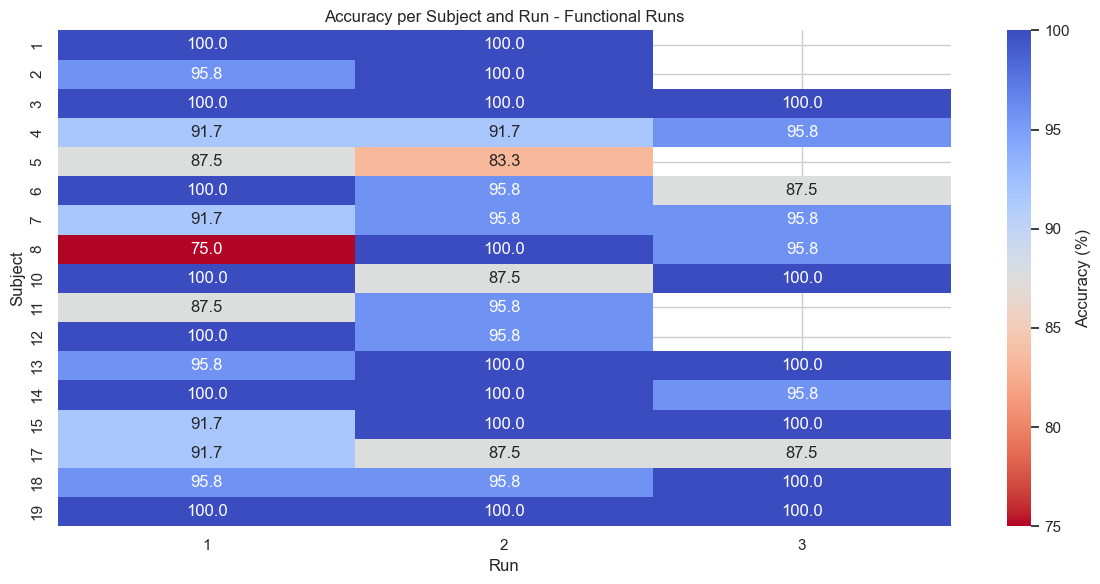

In [13]:
# Convert your accuracies dataframe into a pivot table
heatmap_data = df.copy()

# Separate subject and run as you already did
heatmap_data[["Subject", "Run"]] = heatmap_data["Participant_Run"].str.split("_", expand=True)
heatmap_data["Subject"] = heatmap_data["Subject"].str.replace("sub", "", regex=False)
heatmap_data["Run"] = heatmap_data["Run"].str.replace("run", "", regex=False)

# Convert to integers to sort properly
heatmap_data["Subject"] = heatmap_data["Subject"].astype(int)
heatmap_data["Run"] = heatmap_data["Run"].astype(int)

# Create a pivot table
pivot_table = heatmap_data.pivot(index="Subject", columns="Run", values="Accuracy")

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    cmap="coolwarm_r",
    linewidths=0,  # Set to 0 to remove gridlines entirely
    linecolor="white",
    annot=True, fmt=".1f",  # Optional: show values in cells
    cbar_kws={"label": "Accuracy (%)"}
)
sns.set_theme(style="whitegrid")
plt.title("Accuracy per Subject and Run - Functional Runs")
plt.xlabel("Run")
plt.ylabel("Subject")
plt.tight_layout()
plt.show()

## Check differences 

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = pd.read_csv('/Users/danieljanini/Documents/Thesis/accuracy_results.csv')
# Assuming your DataFrame is called df
# One-way ANOVA: Accuracy ~ RunType
model = ols('Accuracy ~ C(RunType)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq     df         F    PR(>F)
C(RunType)   163.961221    2.0  1.407876  0.247876
Residual    8734.500480  150.0       NaN       NaN


In [16]:
df.head(10)

,Participant_Run,Accuracy
0,sub01_run1,100.000000
1,sub01_run2,100.000000
2,sub02_run1,95.833333
3,sub02_run2,100.000000
4,sub03_run1,100.000000
5,sub03_run2,100.000000
6,sub03_run3,100.000000
7,sub04_run1,91.666667
8,sub04_run2,91.666667
9,sub04_run3,95.833333


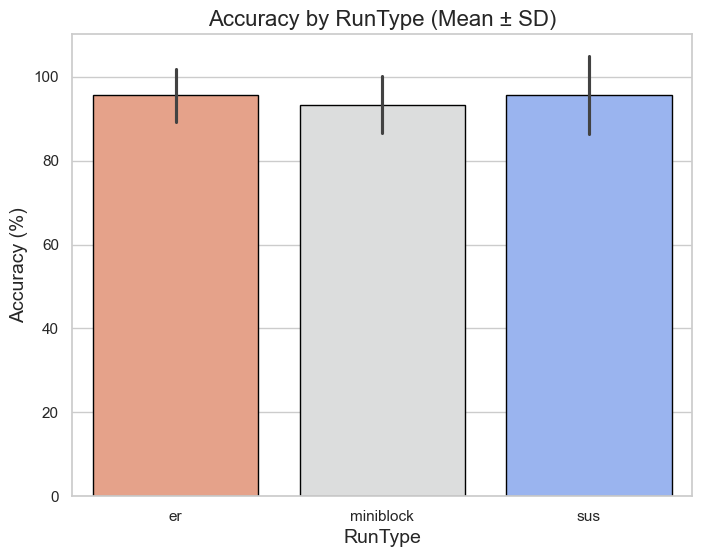

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='RunType', y='Accuracy', errorbar = 'sd',palette='coolwarm_r',hue = "RunType", edgecolor='black')

# Add labels and title
plt.title('Accuracy by RunType (Mean ± SD)', fontsize=16)
plt.xlabel('RunType', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)

plt.show()
